       VALORES DISPONIBILIZADOS PARA TODOS OS ESTADOS DO BRASIL       


,VALOR PARCELA
UF,
AC,19006.0
AL,205399.0
AM,98715.0
AP,20485.0
BA,483381.0
CE,368440.0
DF,148388.0
ES,55802.0
GO,104051.0


        O ESTADO QUE MAIS RECEBEU PAGAMENTOS DO AUXILIO BRASIL        
MARANHÃO : R$ 525982.0


,VALOR PARCELA
UF,
MA,525982.0


           OS 5 PRIMEIROS BENEFICIÁRIOS QUE MAIS RECEBERAM            


,TOTAL RECEBIDO
NOME FAVORECIDO,
MARIA JOSE DA SILVA,4000.0
MARIA JOSE MARTINS ALVES,3364.0
ELISSANDRA PINHEIRO SALES,2948.0
TALITHA MARA DA SILVA MORAIS,2800.0
ALCIONE RODRIGUES DA SILVA,2800.0


                    GRÁFICO DOS VALORES RECEBIDOS                     


<Axes: xlabel='TOTAL RECEBIDO'>

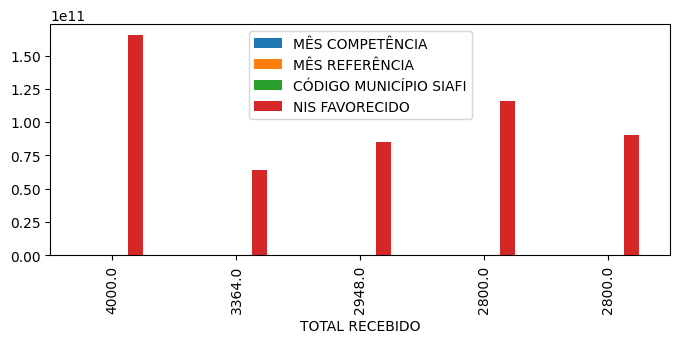

In [21]:
import pandas as pd
auxilio_df = pd.read_csv('AuxilioBrasil_0.csv', sep=';', encoding= 'latin-1')
auxilio_df['UF'] = auxilio_df['UF'].astype('string')
auxilio_df['NOME FAVORECIDO'] = auxilio_df['NOME FAVORECIDO'].astype('string')
auxilio_df['NOME MUNICÍPIO'] = auxilio_df['NOME MUNICÍPIO'].astype('string')
auxilio_df['VALOR PARCELA'] = auxilio_df['VALOR PARCELA'].apply(lambda x: str(x).replace(",","."))
auxilio_df['VALOR PARCELA'] = auxilio_df['VALOR PARCELA'].astype('Float64')

# Analise do valor disponibilizado para cada estado

print(f'=' * 70)
print('VALORES DISPONIBILIZADOS PARA TODOS OS ESTADOS DO BRASIL'.center(70))
print(f'=' * 70)
uf_df = auxilio_df.groupby('UF').sum('VALOR PARCELA')
estadoMaior_df = uf_df.sort_values('VALOR PARCELA', ascending=False)
display(uf_df[['VALOR PARCELA']])

# Buscando o estado que mais recebeu

maiorValor = uf_df['VALOR PARCELA'].max()
estado = uf_df['VALOR PARCELA'].idxmax()
print('=' * 70)
print("O ESTADO QUE MAIS RECEBEU PAGAMENTOS DO AUXILIO BRASIL".center(70))
print('=' * 70)
if estado == 'AC':
    estado = 'ACRÊ'
elif estado == 'AL':
    estado = 'ALAGOAS'
elif estado == 'AM':
    estado = 'AMAZÔNAS'
elif estado == 'AP':
    estado = 'AMAPÁ'
elif estado == 'BA':
    estado = 'BAHIA'
elif estado == 'CE':
    estado = 'CEARÁ'
elif estado == 'DF':
    estado = 'DISTRITO FEDERAL'
elif estado == 'ES':
    estado = 'ESPÍRITO SANTO'
elif estado == 'GO':
    estado = 'GOIÁS'
elif estado == 'MA':
    estado = 'MARANHÃO'
elif estado == 'MT':
    estado = 'MATO GROSSO'
elif estado == 'MS':
    estado = 'MATO GROSSO DO SUL'
elif estado == 'MG':
    estado = 'MINAS GERAIS'
elif estado == 'PA':
    estado = 'PARÁ'
elif estado == 'PB':
    estado = 'PERNAMBUCO'
elif estado == 'PI':
    estado = 'PIAUÍ'
elif estado == 'RJ':
    estado = 'RIO DE JANEIRO'
elif estado == 'RN':
    estado = 'RIO GRANDE DO NORTE'
elif estado == 'RS':
    estado = 'RIO GRANDE DO SUL'
elif estado == 'RO':
    estado = 'RONDÔNIA'
elif estado == 'RR':
    estado = 'RORAIMA'
elif estado == 'SC':
    estado = 'SANTA CATARINA'
elif estado == 'SP':
    estado = 'SÃO PAULO'
elif estado == 'SE':
    estado = 'SERGIPE'
else:
    estado = 'TOCANTINS'
print(f"{estado} : R$ {maiorValor}")
display(estadoMaior_df[['VALOR PARCELA']][:1])

# Analise dos 5 primeiros beneciários que mais receberam

nome_df = auxilio_df.groupby(['NOME FAVORECIDO']).sum('VALOR PARCELA')
ordenado_df = nome_df.sort_values('VALOR PARCELA', ascending=False)
ordenado_df = ordenado_df.rename(columns={'VALOR PARCELA': 'TOTAL RECEBIDO'})
print('=' * 70)
print('OS 5 PRIMEIROS BENEFICIÁRIOS QUE MAIS RECEBERAM'.center(70))
print('=' * 70)
display(ordenado_df[['TOTAL RECEBIDO']][:5])

print('=' * 70)
print('GRÁFICO DOS 5 PRIMEIROS BENEFICIÁRIOS(DO MAIOR PARA O MENOR)'.center(70))
print('=' * 70)
ordenado_df[:5].plot('TOTAL RECEBIDO', figsize=(8, 3), kind= 'bar')
